In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# First step will be to import the feature data and the labels
data_path = "C:/Users/biapt/Documents/full_wei_data.csv";
data = pd.read_csv(data_path)
# here what everything means:
'''
frequencies = {"alpha","beta","delta","theta","gamma"};
epochs = {'ec1','emf5','ec1','if5','emf5','eml5','ec3','ec8'};
graph = {"aec","pli"}
The ids we see are mapping to these
'''
data

,p_id,frequency,epoch,graph,window,mean_1,mean_2,mean_3,mean_4,mean_5,...,clust_coeff_ 77,clust_coeff_ 78,clust_coeff_ 79,clust_coeff_ 80,clust_coeff_ 81,clust_coeff_ 82,norm_avg_clust_coeff,norm_g_eff,community,small_worldness
0,1,1,1,0,1,0.214410,0.206480,0.186960,0.095920,0.185300,...,0.111200,0.127020,0.102430,0.137680,0.151390,0.101670,0.99897,0.97336,0.147250,0.95888
1,1,1,1,1,1,0.135180,0.133150,0.066425,0.142670,0.187410,...,0.106720,0.128150,0.104750,0.105940,0.094395,0.109470,0.99442,0.97609,0.117070,0.95943
2,1,1,1,0,2,0.173520,0.176050,0.207510,0.196660,0.100010,...,0.193260,0.181300,0.098848,0.171360,0.131640,0.119280,0.99763,0.98745,0.083997,0.97921
3,1,1,1,1,2,0.135480,0.110920,0.099013,0.136760,0.166900,...,0.091389,0.103490,0.113290,0.102150,0.087017,0.120590,0.99338,0.98542,0.119380,0.96962
4,1,1,1,0,3,0.090807,0.194400,0.160160,0.122470,0.049862,...,0.115170,0.109680,0.092119,0.157790,0.145170,0.150840,0.99841,0.98561,0.147540,0.97606
5,1,1,1,1,3,0.089552,0.056574,0.085036,0.109230,0.130940,...,0.101490,0.087030,0.086551,0.071742,0.069271,0.094503,0.99216,0.98582,0.110580,0.96761
6,1,1,1,0,4,0.092985,0.167780,0.171060,0.174230,0.075009,...,0.132310,0.112610,0.099264,0.141140,0.116810,0.122770,0.99815,0.98590,0.142180,0.97396
7,1,1,1,1,4,0.056143,0.058897,0.039806,0.064573,0.101440,...,0.108020,0.113390,0.078162,0.068628,0.074071,0.096014,0.99498,0.98338,0.121510,0.97278
8,1,1,1,0,5,0.085757,0.135000,0.094392,0.174200,0.048321,...,0.097576,0.108650,0.116480,0.127690,0.107610,0.087126,0.99925,0.99085,0.142330,0.98124
9,1,1,1,1,5,0.104530,0.089392,0.081475,0.106140,0.129180,...,0.085813,0.122850,0.074097,0.087794,0.088316,0.095469,0.99460,0.98725,0.119500,0.97627


In [3]:
# We will keep the same structure than we did in the AEC vs wPLI project for the machine learning

# Machine Learning 
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
# Sklearn utils
from sklearn.base import clone
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# aec = 0 pli = 1
analysis_type = 0
epochs_to_keep = [1,5]
analysis = data['graph'] == analysis_type
baseline = data['epoch'] == epochs_to_keep[0]
other = data['epoch'] == epochs_to_keep[1]
subset_data = data[analysis & (baseline | other)]

clfs = [LinearDiscriminantAnalysis(solver='svd'), SVC(kernel='linear', C=0.1),SVC(kernel='linear', C=0.5), SVC(kernel='linear', C=1.0), SVC(kernel='rbf', C=0.1), SVC(kernel='rbf',C=1.0),RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)]
selected_clf = clfs[2]

def classify(dataset, original_clf):
    clf = clone(original_clf)
    # Initialize the Result data structures
    cms = []
    accuracies = []
    reports = []
    # TODO: Check in the MATLAB file how to not have to do this + 1
    for test_id in range(1,10):
        print("Participant: " + str(test_id) + " in hold-out set:")
        
        # Split the data in a leave one subject out manner
        
        # Get the training and test dataset
        training_dataset = dataset[dataset['p_id'] != test_id]
        test_dataset = dataset[dataset['p_id'] == test_id]
        
        # Get the X and Y 
        X_train = training_dataset.iloc[:,5:]
        y_train = training_dataset['epoch']
        
        # Training the min max normalizer
        min_max_scaler = MinMaxScaler()
        min_max_scaler.fit(X_train)
        X_train = min_max_scaler.transform(X_train)
        
        X_test = test_dataset.iloc[:,5:]
        y_test = test_dataset['epoch']
        
        # Normalize the test set using a training scaler
        X_test = min_max_scaler.transform(X_test)
        
        # Fitting our model
        clf.fit(X_train, y_train)

        # predicting
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        #print("Generalization accuracy: " + str(accuracy))
        #print(cm)
        #print(report)
        
        # Saving the results
        cms.append(cm)
        accuracies.append(accuracy)
        reports.append(report)
        
    return (cms,accuracies,reports)

(cms, accuracies, report) = classify(subset_data, selected_clf)
print("Mean accuracy is: " + str(np.mean(accuracies)))

Participant: 1 in hold-out set:
Participant: 2 in hold-out set:
Participant: 3 in hold-out set:
Participant: 4 in hold-out set:
Participant: 5 in hold-out set:
Participant: 6 in hold-out set:
Participant: 7 in hold-out set:
Participant: 8 in hold-out set:
Participant: 9 in hold-out set:
Mean accuracy is: 0.5528204182108506


In [4]:
# Iterating through all the epoch and aggregating all the averages
selected_clf = clfs[6] # goes from 0 to 7
total = 0
for a_i in range(0,2):
    for e_i in range(2,6):
        analysis_type = a_i # 0 = aec, 1 = wPLI
        epochs_to_keep = [1,e_i]
        analysis = data['graph'] == analysis_type
        baseline = data['epoch'] == epochs_to_keep[0]
        other = data['epoch'] == epochs_to_keep[1]
        subset_data = data[analysis & (baseline | other)]
        (cms, accuracies, report) = classify(subset_data, selected_clf)
        total = total + np.mean(accuracies)
print("Average performance for classifier = " + str(total/8))

Participant: 1 in hold-out set:
Participant: 2 in hold-out set:
Participant: 3 in hold-out set:
Participant: 4 in hold-out set:
Participant: 5 in hold-out set:
Participant: 6 in hold-out set:
Participant: 7 in hold-out set:
Participant: 8 in hold-out set:
Participant: 9 in hold-out set:
Participant: 1 in hold-out set:
Participant: 2 in hold-out set:
Participant: 3 in hold-out set:
Participant: 4 in hold-out set:
Participant: 5 in hold-out set:
Participant: 6 in hold-out set:
Participant: 7 in hold-out set:
Participant: 8 in hold-out set:
Participant: 9 in hold-out set:
Participant: 1 in hold-out set:
Participant: 2 in hold-out set:
Participant: 3 in hold-out set:
Participant: 4 in hold-out set:
Participant: 5 in hold-out set:
Participant: 6 in hold-out set:
Participant: 7 in hold-out set:
Participant: 8 in hold-out set:
Participant: 9 in hold-out set:
Participant: 1 in hold-out set:
Participant: 2 in hold-out set:
Participant: 3 in hold-out set:
Participant: 4 in hold-out set:
Particip

## Average Classification Result
- LDA : 0.6650799789491493
- Linear SVM C=0.1 : 0.6850622618599771
- Linear SVM C=0.5 : 0.6852205308138111
- Linear SVM C=1.0 : 0.6842265725506583
- RBF SVM C=0.1 : 0.5581517916164056
- RBF SVM C=1.0 : 0.6448795803208284
- RF n=100, max=2 : 0.6528903224361835

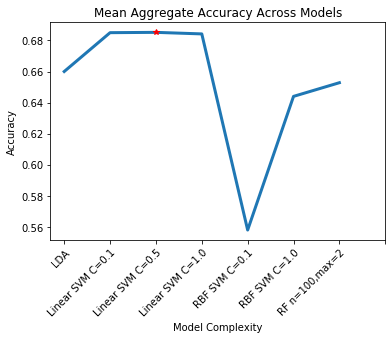

In [34]:
# Generating the figure 
# Visualization
import matplotlib.pyplot as plt
#Helper function
def make_plot(data,title):
    #static data
    models = ["LDA","Linear SVM C=0.1", "Linear SVM C=0.5", "Linear SVM C=1.0", "RBF SVM C=0.1", "RBF SVM C=1.0", "RF n=100,max=2"]
    x = [0,1,2,3,4,5,6]

    # Figure 
    fig = plt.figure()
    ax = plt.axes()

    ax.plot(x, data, linewidth=3)
    ax.plot(2,data[2],'r*')

    ax.set(xticks=np.arange(len(data) + 1),
        # ... and label them with the respective list entries
        xticklabels=models,
        title=title,
        ylabel='Accuracy',
        xlabel='Model Complexity')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
        rotation_mode="anchor")

    plt.show()
    
aggregate = [0.66, 0.6850, 0.6852, 0.6842, 0.558, 0.644 ,0.6528]
make_plot(aggregate, "Mean Aggregate Accuracy Across Models")

In [43]:
from math import floor
import copy
from sklearn.utils import resample

# Now we need to add in the bootstrap confidence interval and the permutation testing
# Iterate num_bootstrap times and create a classifier with the resampled data
# Then create confidence interval for the and the accuracy, f_1 score
# The p value used here is 0.05
# This means that the lower bound = math.floor((num_bootstrap/100)*2.5)
#                     upper bound = math.floor((num_bootstrap/100)*97.5)
def generate_confidence_interval(original_dataset, clf, num_bootstrap):
    lb_index = floor((num_bootstrap/100)*(2.5))
    ub_index = floor((num_bootstrap/100)*(97.5))

    accuracies = []

    conf_interval_accuracy = (-1,-1)

    # Here we overwrite the dataset X, y and I and run the classify function
    # for each bootstrap samples
    for b_id in range(num_bootstrap):
        print("Bootstrap sample #" + str(b_id))
        # Copy the original dataset before manipulating it
        dataset = copy.deepcopy(original_dataset)

        # Get the sampled with replacement dataset
        resampled_data = resample(dataset)

        # Classify and get the results
        (cms, acc, report) = classify(resampled_data, clf)

        accuracies.append(np.mean(acc))
                          
    # Sort the results
    accuracies.sort()

    # Set the confidence interval at the right index
    conf_interval_accuracy = (accuracies[lb_index],accuracies[ub_index])

    return (accuracies,conf_interval_accuracy)

# Bootstrap experiment setup
selected_clf = clfs[2] # 2 was the best
analysis_type = 0 # 0 = aec, 1 = wPLI
epochs_to_keep = [1,3]
analysis = data['graph'] == analysis_type
baseline = data['epoch'] == epochs_to_keep[0]
other = data['epoch'] == epochs_to_keep[1]
subset_data = data[analysis & (baseline | other)]
                          
# Generate confidence interval for the classifier
num_bootstrap = 100
(accuracies,conf_interval_accuracy) = generate_confidence_interval(subset_data, selected_clf, num_bootstrap)
print("Confidence interval for Accuracy: " + str(conf_interval_accuracy))

Bootstrap sample #0
Participant: 1 in hold-out set:
Generalization accuracy: 0.9310344827586207
[[50  6]
 [ 2 58]]
{'1': {'precision': 0.9615384615384616, 'recall': 0.8928571428571429, 'f1-score': 0.9259259259259259, 'support': 56}, '3': {'precision': 0.90625, 'recall': 0.9666666666666667, 'f1-score': 0.9354838709677419, 'support': 60}, 'accuracy': 0.9310344827586207, 'macro avg': {'precision': 0.9338942307692308, 'recall': 0.9297619047619048, 'f1-score': 0.9307048984468339, 'support': 116}, 'weighted avg': {'precision': 0.9329409814323607, 'recall': 0.9310344827586207, 'f1-score': 0.9308696906027273, 'support': 116}}
Participant: 2 in hold-out set:
Generalization accuracy: 0.865979381443299
[[40  1]
 [12 44]]
{'1': {'precision': 0.7692307692307693, 'recall': 0.975609756097561, 'f1-score': 0.860215053763441, 'support': 41}, '3': {'precision': 0.9777777777777777, 'recall': 0.7857142857142857, 'f1-score': 0.8712871287128713, 'support': 56}, 'accuracy': 0.865979381443299, 'macro avg': {'p

Generalization accuracy: 0.8426966292134831
[[34  0]
 [14 41]]
{'1': {'precision': 0.7083333333333334, 'recall': 1.0, 'f1-score': 0.8292682926829268, 'support': 34}, '3': {'precision': 1.0, 'recall': 0.7454545454545455, 'f1-score': 0.8541666666666666, 'support': 55}, 'accuracy': 0.8426966292134831, 'macro avg': {'precision': 0.8541666666666667, 'recall': 0.8727272727272728, 'f1-score': 0.8417174796747967, 'support': 89}, 'weighted avg': {'precision': 0.8885767790262173, 'recall': 0.8426966292134831, 'f1-score': 0.8446549282908559, 'support': 89}}
Participant: 7 in hold-out set:
Generalization accuracy: 0.946236559139785
[[40  1]
 [ 4 48]]
{'1': {'precision': 0.9090909090909091, 'recall': 0.975609756097561, 'f1-score': 0.9411764705882352, 'support': 41}, '3': {'precision': 0.9795918367346939, 'recall': 0.9230769230769231, 'f1-score': 0.9504950495049506, 'support': 52}, 'accuracy': 0.946236559139785, 'macro avg': {'precision': 0.9443413729128014, 'recall': 0.949343339587242, 'f1-score': 

Generalization accuracy: 0.9669421487603306
[[63  0]
 [ 4 54]]
{'1': {'precision': 0.9402985074626866, 'recall': 1.0, 'f1-score': 0.9692307692307692, 'support': 63}, '3': {'precision': 1.0, 'recall': 0.9310344827586207, 'f1-score': 0.9642857142857143, 'support': 58}, 'accuracy': 0.9669421487603306, 'macro avg': {'precision': 0.9701492537313433, 'recall': 0.9655172413793103, 'f1-score': 0.9667582417582418, 'support': 121}, 'weighted avg': {'precision': 0.9689157518194154, 'recall': 0.9669421487603306, 'f1-score': 0.9668604123149578, 'support': 121}}
Participant: 3 in hold-out set:
Generalization accuracy: 0.9262295081967213
[[50  6]
 [ 3 63]]
{'1': {'precision': 0.9433962264150944, 'recall': 0.8928571428571429, 'f1-score': 0.9174311926605505, 'support': 56}, '3': {'precision': 0.9130434782608695, 'recall': 0.9545454545454546, 'f1-score': 0.9333333333333332, 'support': 66}, 'accuracy': 0.9262295081967213, 'macro avg': {'precision': 0.9282198523379819, 'recall': 0.9237012987012987, 'f1-sc

Generalization accuracy: 0.9052631578947369
[[45  1]
 [ 8 41]]
{'1': {'precision': 0.8490566037735849, 'recall': 0.9782608695652174, 'f1-score': 0.9090909090909092, 'support': 46}, '3': {'precision': 0.9761904761904762, 'recall': 0.8367346938775511, 'f1-score': 0.9010989010989012, 'support': 49}, 'accuracy': 0.9052631578947369, 'macro avg': {'precision': 0.9126235399820306, 'recall': 0.9074977817213843, 'f1-score': 0.9050949050949052, 'support': 95}, 'weighted avg': {'precision': 0.9146309169149288, 'recall': 0.9052631578947369, 'f1-score': 0.9049687154950313, 'support': 95}}
Participant: 8 in hold-out set:
Generalization accuracy: 0.7798165137614679
[[43 16]
 [ 8 42]]
{'1': {'precision': 0.8431372549019608, 'recall': 0.7288135593220338, 'f1-score': 0.7818181818181819, 'support': 59}, '3': {'precision': 0.7241379310344828, 'recall': 0.84, 'f1-score': 0.7777777777777777, 'support': 50}, 'accuracy': 0.7798165137614679, 'macro avg': {'precision': 0.7836375929682218, 'recall': 0.7844067796

Generalization accuracy: 0.9142857142857143
[[45  9]
 [ 0 51]]
{'1': {'precision': 1.0, 'recall': 0.8333333333333334, 'f1-score': 0.9090909090909091, 'support': 54}, '3': {'precision': 0.85, 'recall': 1.0, 'f1-score': 0.9189189189189189, 'support': 51}, 'accuracy': 0.9142857142857143, 'macro avg': {'precision': 0.925, 'recall': 0.9166666666666667, 'f1-score': 0.914004914004914, 'support': 105}, 'weighted avg': {'precision': 0.927142857142857, 'recall': 0.9142857142857143, 'f1-score': 0.9138645138645138, 'support': 105}}
Participant: 5 in hold-out set:
Generalization accuracy: 0.8034188034188035
[[28 23]
 [ 0 66]]
{'1': {'precision': 1.0, 'recall': 0.5490196078431373, 'f1-score': 0.7088607594936709, 'support': 51}, '3': {'precision': 0.7415730337078652, 'recall': 1.0, 'f1-score': 0.8516129032258065, 'support': 66}, 'accuracy': 0.8034188034188035, 'macro avg': {'precision': 0.8707865168539326, 'recall': 0.7745098039215687, 'f1-score': 0.7802368313597388, 'support': 117}, 'weighted avg': 

Generalization accuracy: 0.9824561403508771
[[53  1]
 [ 1 59]]
{'1': {'precision': 0.9814814814814815, 'recall': 0.9814814814814815, 'f1-score': 0.9814814814814815, 'support': 54}, '3': {'precision': 0.9833333333333333, 'recall': 0.9833333333333333, 'f1-score': 0.9833333333333333, 'support': 60}, 'accuracy': 0.9824561403508771, 'macro avg': {'precision': 0.9824074074074074, 'recall': 0.9824074074074074, 'f1-score': 0.9824074074074074, 'support': 114}, 'weighted avg': {'precision': 0.9824561403508771, 'recall': 0.9824561403508771, 'f1-score': 0.9824561403508771, 'support': 114}}
Participant: 2 in hold-out set:
Generalization accuracy: 0.8365384615384616
[[58  0]
 [17 29]]
{'1': {'precision': 0.7733333333333333, 'recall': 1.0, 'f1-score': 0.8721804511278195, 'support': 58}, '3': {'precision': 1.0, 'recall': 0.6304347826086957, 'f1-score': 0.7733333333333333, 'support': 46}, 'accuracy': 0.8365384615384616, 'macro avg': {'precision': 0.8866666666666667, 'recall': 0.8152173913043479, 'f1-sc

Generalization accuracy: 0.8706896551724138
[[44  0]
 [15 57]]
{'1': {'precision': 0.7457627118644068, 'recall': 1.0, 'f1-score': 0.8543689320388349, 'support': 44}, '3': {'precision': 1.0, 'recall': 0.7916666666666666, 'f1-score': 0.8837209302325582, 'support': 72}, 'accuracy': 0.8706896551724138, 'macro avg': {'precision': 0.8728813559322034, 'recall': 0.8958333333333333, 'f1-score': 0.8690449311356965, 'support': 116}, 'weighted avg': {'precision': 0.9035651665692577, 'recall': 0.8706896551724138, 'f1-score': 0.8725874136763183, 'support': 116}}
Participant: 7 in hold-out set:
Generalization accuracy: 0.9126984126984127
[[68  4]
 [ 7 47]]
{'1': {'precision': 0.9066666666666666, 'recall': 0.9444444444444444, 'f1-score': 0.9251700680272109, 'support': 72}, '3': {'precision': 0.9215686274509803, 'recall': 0.8703703703703703, 'f1-score': 0.8952380952380952, 'support': 54}, 'accuracy': 0.9126984126984127, 'macro avg': {'precision': 0.9141176470588235, 'recall': 0.9074074074074074, 'f1-sc

Generalization accuracy: 0.9172932330827067
[[63  0]
 [11 59]]
{'1': {'precision': 0.8513513513513513, 'recall': 1.0, 'f1-score': 0.9197080291970803, 'support': 63}, '3': {'precision': 1.0, 'recall': 0.8428571428571429, 'f1-score': 0.9147286821705426, 'support': 70}, 'accuracy': 0.9172932330827067, 'macro avg': {'precision': 0.9256756756756757, 'recall': 0.9214285714285715, 'f1-score': 0.9172183556838114, 'support': 133}, 'weighted avg': {'precision': 0.9295874822190612, 'recall': 0.9172932330827067, 'f1-score': 0.9170873202357446, 'support': 133}}
Participant: 3 in hold-out set:
Generalization accuracy: 0.8869565217391304
[[50 11]
 [ 2 52]]
{'1': {'precision': 0.9615384615384616, 'recall': 0.819672131147541, 'f1-score': 0.8849557522123893, 'support': 61}, '3': {'precision': 0.8253968253968254, 'recall': 0.9629629629629629, 'f1-score': 0.8888888888888888, 'support': 54}, 'accuracy': 0.8869565217391304, 'macro avg': {'precision': 0.8934676434676434, 'recall': 0.8913175470552519, 'f1-sco

Generalization accuracy: 0.8842105263157894
[[28  5]
 [ 6 56]]
{'1': {'precision': 0.8235294117647058, 'recall': 0.8484848484848485, 'f1-score': 0.8358208955223881, 'support': 33}, '3': {'precision': 0.9180327868852459, 'recall': 0.9032258064516129, 'f1-score': 0.9105691056910569, 'support': 62}, 'accuracy': 0.8842105263157894, 'macro avg': {'precision': 0.8707810993249758, 'recall': 0.8758553274682307, 'f1-score': 0.8731950006067225, 'support': 95}, 'weighted avg': {'precision': 0.8852052986854794, 'recall': 0.8842105263157894, 'f1-score': 0.8846039379482562, 'support': 95}}
Participant: 9 in hold-out set:
Generalization accuracy: 0.9915966386554622
[[55  1]
 [ 0 63]]
{'1': {'precision': 1.0, 'recall': 0.9821428571428571, 'f1-score': 0.9909909909909909, 'support': 56}, '3': {'precision': 0.984375, 'recall': 1.0, 'f1-score': 0.9921259842519685, 'support': 63}, 'accuracy': 0.9915966386554622, 'macro avg': {'precision': 0.9921875, 'recall': 0.9910714285714286, 'f1-score': 0.9915584876214

Generalization accuracy: 0.923728813559322
[[47  9]
 [ 0 62]]
{'1': {'precision': 1.0, 'recall': 0.8392857142857143, 'f1-score': 0.9126213592233009, 'support': 56}, '3': {'precision': 0.8732394366197183, 'recall': 1.0, 'f1-score': 0.9323308270676691, 'support': 62}, 'accuracy': 0.923728813559322, 'macro avg': {'precision': 0.9366197183098591, 'recall': 0.9196428571428572, 'f1-score': 0.922476093145485, 'support': 118}, 'weighted avg': {'precision': 0.9333969921222248, 'recall': 0.923728813559322, 'f1-score': 0.9229771813110199, 'support': 118}}
Participant: 5 in hold-out set:
Generalization accuracy: 0.7941176470588235
[[29 19]
 [ 2 52]]
{'1': {'precision': 0.9354838709677419, 'recall': 0.6041666666666666, 'f1-score': 0.7341772151898733, 'support': 48}, '3': {'precision': 0.7323943661971831, 'recall': 0.9629629629629629, 'f1-score': 0.832, 'support': 54}, 'accuracy': 0.7941176470588235, 'macro avg': {'precision': 0.8339391185824625, 'recall': 0.7835648148148148, 'f1-score': 0.783088607

Generalization accuracy: 0.9174311926605505
[[59  0]
 [ 9 41]]
{'1': {'precision': 0.8676470588235294, 'recall': 1.0, 'f1-score': 0.9291338582677166, 'support': 59}, '3': {'precision': 1.0, 'recall': 0.82, 'f1-score': 0.9010989010989011, 'support': 50}, 'accuracy': 0.9174311926605505, 'macro avg': {'precision': 0.9338235294117647, 'recall': 0.9099999999999999, 'f1-score': 0.9151163796833088, 'support': 109}, 'weighted avg': {'precision': 0.92835941716136, 'recall': 0.9174311926605505, 'f1-score': 0.9162737861719297, 'support': 109}}
Participant: 3 in hold-out set:
Generalization accuracy: 0.8672566371681416
[[47 13]
 [ 2 51]]
{'1': {'precision': 0.9591836734693877, 'recall': 0.7833333333333333, 'f1-score': 0.8623853211009175, 'support': 60}, '3': {'precision': 0.796875, 'recall': 0.9622641509433962, 'f1-score': 0.8717948717948717, 'support': 53}, 'accuracy': 0.8672566371681416, 'macro avg': {'precision': 0.8780293367346939, 'recall': 0.8727987421383647, 'f1-score': 0.8670900964478946, 

Generalization accuracy: 0.782258064516129
[[43 12]
 [15 54]]
{'1': {'precision': 0.7413793103448276, 'recall': 0.7818181818181819, 'f1-score': 0.7610619469026548, 'support': 55}, '3': {'precision': 0.8181818181818182, 'recall': 0.782608695652174, 'f1-score': 0.8, 'support': 69}, 'accuracy': 0.782258064516129, 'macro avg': {'precision': 0.7797805642633229, 'recall': 0.7822134387351779, 'f1-score': 0.7805309734513275, 'support': 124}, 'weighted avg': {'precision': 0.7841161897057337, 'recall': 0.782258064516129, 'f1-score': 0.782729089351984, 'support': 124}}
Participant: 9 in hold-out set:
Generalization accuracy: 0.9421487603305785
[[55  7]
 [ 0 59]]
{'1': {'precision': 1.0, 'recall': 0.8870967741935484, 'f1-score': 0.9401709401709402, 'support': 62}, '3': {'precision': 0.8939393939393939, 'recall': 1.0, 'f1-score': 0.944, 'support': 59}, 'accuracy': 0.9421487603305785, 'macro avg': {'precision': 0.946969696969697, 'recall': 0.9435483870967742, 'f1-score': 0.9420854700854701, 'support

Generalization accuracy: 0.9548872180451128
[[53  5]
 [ 1 74]]
{'1': {'precision': 0.9814814814814815, 'recall': 0.9137931034482759, 'f1-score': 0.9464285714285714, 'support': 58}, '3': {'precision': 0.9367088607594937, 'recall': 0.9866666666666667, 'f1-score': 0.961038961038961, 'support': 75}, 'accuracy': 0.9548872180451128, 'macro avg': {'precision': 0.9590951711204876, 'recall': 0.9502298850574713, 'f1-score': 0.9537337662337662, 'support': 133}, 'weighted avg': {'precision': 0.9562337630292327, 'recall': 0.9548872180451128, 'f1-score': 0.9546675129381896, 'support': 133}}
Participant: 5 in hold-out set:
Generalization accuracy: 0.7666666666666667
[[26 27]
 [ 1 66]]
{'1': {'precision': 0.9629629629629629, 'recall': 0.49056603773584906, 'f1-score': 0.65, 'support': 53}, '3': {'precision': 0.7096774193548387, 'recall': 0.9850746268656716, 'f1-score': 0.8250000000000001, 'support': 67}, 'accuracy': 0.7666666666666667, 'macro avg': {'precision': 0.8363201911589009, 'recall': 0.73782033

Generalization accuracy: 0.9306930693069307
[[45  4]
 [ 3 49]]
{'1': {'precision': 0.9375, 'recall': 0.9183673469387755, 'f1-score': 0.9278350515463918, 'support': 49}, '3': {'precision': 0.9245283018867925, 'recall': 0.9423076923076923, 'f1-score': 0.9333333333333333, 'support': 52}, 'accuracy': 0.9306930693069307, 'macro avg': {'precision': 0.9310141509433962, 'recall': 0.930337519623234, 'f1-score': 0.9305841924398626, 'support': 101}, 'weighted avg': {'precision': 0.9308215019615169, 'recall': 0.9306930693069307, 'f1-score': 0.9306658500901637, 'support': 101}}
Bootstrap sample #21
Participant: 1 in hold-out set:
Generalization accuracy: 0.9411764705882353
[[43  0]
 [ 6 53]]
{'1': {'precision': 0.8775510204081632, 'recall': 1.0, 'f1-score': 0.9347826086956522, 'support': 43}, '3': {'precision': 1.0, 'recall': 0.8983050847457628, 'f1-score': 0.9464285714285715, 'support': 59}, 'accuracy': 0.9411764705882353, 'macro avg': {'precision': 0.9387755102040816, 'recall': 0.9491525423728814

Generalization accuracy: 0.9207920792079208
[[42  0]
 [ 8 51]]
{'1': {'precision': 0.84, 'recall': 1.0, 'f1-score': 0.9130434782608696, 'support': 42}, '3': {'precision': 1.0, 'recall': 0.864406779661017, 'f1-score': 0.9272727272727274, 'support': 59}, 'accuracy': 0.9207920792079208, 'macro avg': {'precision': 0.9199999999999999, 'recall': 0.9322033898305084, 'f1-score': 0.9201581027667984, 'support': 101}, 'weighted avg': {'precision': 0.9334653465346535, 'recall': 0.9207920792079208, 'f1-score': 0.9213556138222518, 'support': 101}}
Participant: 7 in hold-out set:
Generalization accuracy: 0.9459459459459459
[[68  0]
 [ 6 37]]
{'1': {'precision': 0.918918918918919, 'recall': 1.0, 'f1-score': 0.9577464788732395, 'support': 68}, '3': {'precision': 1.0, 'recall': 0.8604651162790697, 'f1-score': 0.9249999999999999, 'support': 43}, 'accuracy': 0.9459459459459459, 'macro avg': {'precision': 0.9594594594594594, 'recall': 0.9302325581395349, 'f1-score': 0.9413732394366197, 'support': 111}, 'we

Generalization accuracy: 0.9307692307692308
[[50  7]
 [ 2 71]]
{'1': {'precision': 0.9615384615384616, 'recall': 0.8771929824561403, 'f1-score': 0.9174311926605504, 'support': 57}, '3': {'precision': 0.9102564102564102, 'recall': 0.9726027397260274, 'f1-score': 0.9403973509933774, 'support': 73}, 'accuracy': 0.9307692307692308, 'macro avg': {'precision': 0.9358974358974359, 'recall': 0.9248978610910839, 'f1-score': 0.9289142718269638, 'support': 130}, 'weighted avg': {'precision': 0.9327416173570019, 'recall': 0.9307692307692308, 'f1-score': 0.9303275738782149, 'support': 130}}
Participant: 4 in hold-out set:
Generalization accuracy: 0.9489795918367347
[[50  4]
 [ 1 43]]
{'1': {'precision': 0.9803921568627451, 'recall': 0.9259259259259259, 'f1-score': 0.9523809523809523, 'support': 54}, '3': {'precision': 0.9148936170212766, 'recall': 0.9772727272727273, 'f1-score': 0.945054945054945, 'support': 44}, 'accuracy': 0.9489795918367347, 'macro avg': {'precision': 0.9476428869420108, 'recall

Generalization accuracy: 0.9612403100775194
[[56  5]
 [ 0 68]]
{'1': {'precision': 1.0, 'recall': 0.9180327868852459, 'f1-score': 0.9572649572649572, 'support': 61}, '3': {'precision': 0.9315068493150684, 'recall': 1.0, 'f1-score': 0.9645390070921985, 'support': 68}, 'accuracy': 0.9612403100775194, 'macro avg': {'precision': 0.9657534246575342, 'recall': 0.959016393442623, 'f1-score': 0.9609019821785778, 'support': 129}, 'weighted avg': {'precision': 0.9638950833598809, 'recall': 0.9612403100775194, 'f1-score': 0.961099340119627, 'support': 129}}
Bootstrap sample #26
Participant: 1 in hold-out set:
Generalization accuracy: 0.9572649572649573
[[60  0]
 [ 5 52]]
{'1': {'precision': 0.9230769230769231, 'recall': 1.0, 'f1-score': 0.9600000000000001, 'support': 60}, '3': {'precision': 1.0, 'recall': 0.9122807017543859, 'f1-score': 0.9541284403669724, 'support': 57}, 'accuracy': 0.9572649572649573, 'macro avg': {'precision': 0.9615384615384616, 'recall': 0.956140350877193, 'f1-score': 0.9570

Generalization accuracy: 0.8773584905660378
[[53  0]
 [13 40]]
{'1': {'precision': 0.803030303030303, 'recall': 1.0, 'f1-score': 0.8907563025210083, 'support': 53}, '3': {'precision': 1.0, 'recall': 0.7547169811320755, 'f1-score': 0.8602150537634409, 'support': 53}, 'accuracy': 0.8773584905660378, 'macro avg': {'precision': 0.9015151515151515, 'recall': 0.8773584905660378, 'f1-score': 0.8754856781422247, 'support': 106}, 'weighted avg': {'precision': 0.9015151515151515, 'recall': 0.8773584905660378, 'f1-score': 0.8754856781422247, 'support': 106}}
Participant: 7 in hold-out set:
Generalization accuracy: 0.952755905511811
[[61  1]
 [ 5 60]]
{'1': {'precision': 0.9242424242424242, 'recall': 0.9838709677419355, 'f1-score': 0.9531249999999999, 'support': 62}, '3': {'precision': 0.9836065573770492, 'recall': 0.9230769230769231, 'f1-score': 0.9523809523809524, 'support': 65}, 'accuracy': 0.952755905511811, 'macro avg': {'precision': 0.9539244908097366, 'recall': 0.9534739454094293, 'f1-score

Generalization accuracy: 0.9166666666666666
[[49 10]
 [ 0 61]]
{'1': {'precision': 1.0, 'recall': 0.8305084745762712, 'f1-score': 0.9074074074074074, 'support': 59}, '3': {'precision': 0.8591549295774648, 'recall': 1.0, 'f1-score': 0.9242424242424242, 'support': 61}, 'accuracy': 0.9166666666666666, 'macro avg': {'precision': 0.9295774647887324, 'recall': 0.9152542372881356, 'f1-score': 0.9158249158249159, 'support': 120}, 'weighted avg': {'precision': 0.9284037558685445, 'recall': 0.9166666666666666, 'f1-score': 0.9159652076318743, 'support': 120}}
Participant: 4 in hold-out set:
Generalization accuracy: 0.9401709401709402
[[44  7]
 [ 0 66]]
{'1': {'precision': 1.0, 'recall': 0.8627450980392157, 'f1-score': 0.9263157894736842, 'support': 51}, '3': {'precision': 0.9041095890410958, 'recall': 1.0, 'f1-score': 0.949640287769784, 'support': 66}, 'accuracy': 0.9401709401709402, 'macro avg': {'precision': 0.952054794520548, 'recall': 0.9313725490196079, 'f1-score': 0.9379780386217341, 'suppo

Generalization accuracy: 0.8189655172413793
[[40 16]
 [ 5 55]]
{'1': {'precision': 0.8888888888888888, 'recall': 0.7142857142857143, 'f1-score': 0.792079207920792, 'support': 56}, '3': {'precision': 0.7746478873239436, 'recall': 0.9166666666666666, 'f1-score': 0.8396946564885496, 'support': 60}, 'accuracy': 0.8189655172413793, 'macro avg': {'precision': 0.8317683881064162, 'recall': 0.8154761904761905, 'f1-score': 0.8158869322046708, 'support': 116}, 'weighted avg': {'precision': 0.8297987156656412, 'recall': 0.8189655172413793, 'f1-score': 0.8167078882144596, 'support': 116}}
Participant: 9 in hold-out set:
Generalization accuracy: 0.9596774193548387
[[62  4]
 [ 1 57]]
{'1': {'precision': 0.9841269841269841, 'recall': 0.9393939393939394, 'f1-score': 0.9612403100775193, 'support': 66}, '3': {'precision': 0.9344262295081968, 'recall': 0.9827586206896551, 'f1-score': 0.9579831932773109, 'support': 58}, 'accuracy': 0.9596774193548387, 'macro avg': {'precision': 0.9592766068175904, 'recall

Generalization accuracy: 0.7987012987012987
[[48 31]
 [ 0 75]]
{'1': {'precision': 1.0, 'recall': 0.6075949367088608, 'f1-score': 0.7559055118110236, 'support': 79}, '3': {'precision': 0.7075471698113207, 'recall': 1.0, 'f1-score': 0.8287292817679558, 'support': 75}, 'accuracy': 0.7987012987012987, 'macro avg': {'precision': 0.8537735849056604, 'recall': 0.8037974683544304, 'f1-score': 0.7923173967894896, 'support': 154}, 'weighted avg': {'precision': 0.8575716736094094, 'recall': 0.7987012987012987, 'f1-score': 0.7913716335432959, 'support': 154}}
Participant: 6 in hold-out set:
Generalization accuracy: 0.8076923076923077
[[39  0]
 [20 45]]
{'1': {'precision': 0.6610169491525424, 'recall': 1.0, 'f1-score': 0.7959183673469388, 'support': 39}, '3': {'precision': 1.0, 'recall': 0.6923076923076923, 'f1-score': 0.8181818181818181, 'support': 65}, 'accuracy': 0.8076923076923077, 'macro avg': {'precision': 0.8305084745762712, 'recall': 0.8461538461538461, 'f1-score': 0.8070500927643784, 'sup

Generalization accuracy: 0.9508196721311475
[[60  2]
 [ 4 56]]
{'1': {'precision': 0.9375, 'recall': 0.967741935483871, 'f1-score': 0.9523809523809523, 'support': 62}, '3': {'precision': 0.9655172413793104, 'recall': 0.9333333333333333, 'f1-score': 0.9491525423728815, 'support': 60}, 'accuracy': 0.9508196721311475, 'macro avg': {'precision': 0.9515086206896552, 'recall': 0.9505376344086022, 'f1-score': 0.9507667473769169, 'support': 122}, 'weighted avg': {'precision': 0.9512789711701527, 'recall': 0.9508196721311475, 'f1-score': 0.9507932097540323, 'support': 122}}
Participant: 2 in hold-out set:
Generalization accuracy: 0.8909090909090909
[[57  0]
 [12 41]]
{'1': {'precision': 0.8260869565217391, 'recall': 1.0, 'f1-score': 0.9047619047619047, 'support': 57}, '3': {'precision': 1.0, 'recall': 0.7735849056603774, 'f1-score': 0.8723404255319149, 'support': 53}, 'accuracy': 0.8909090909090909, 'macro avg': {'precision': 0.9130434782608696, 'recall': 0.8867924528301887, 'f1-score': 0.88855

Generalization accuracy: 0.8608695652173913
[[43  0]
 [16 56]]
{'1': {'precision': 0.7288135593220338, 'recall': 1.0, 'f1-score': 0.8431372549019608, 'support': 43}, '3': {'precision': 1.0, 'recall': 0.7777777777777778, 'f1-score': 0.8750000000000001, 'support': 72}, 'accuracy': 0.8608695652173913, 'macro avg': {'precision': 0.8644067796610169, 'recall': 0.8888888888888888, 'f1-score': 0.8590686274509804, 'support': 115}, 'weighted avg': {'precision': 0.8985998526160649, 'recall': 0.8608695652173913, 'f1-score': 0.8630861040068202, 'support': 115}}
Participant: 7 in hold-out set:
Generalization accuracy: 0.8916666666666667
[[57  0]
 [13 50]]
{'1': {'precision': 0.8142857142857143, 'recall': 1.0, 'f1-score': 0.8976377952755905, 'support': 57}, '3': {'precision': 1.0, 'recall': 0.7936507936507936, 'f1-score': 0.8849557522123894, 'support': 63}, 'accuracy': 0.8916666666666667, 'macro avg': {'precision': 0.9071428571428571, 'recall': 0.8968253968253967, 'f1-score': 0.89129677374399, 'suppo

KeyboardInterrupt: 